# Image database to Array Database

## Sample with one image

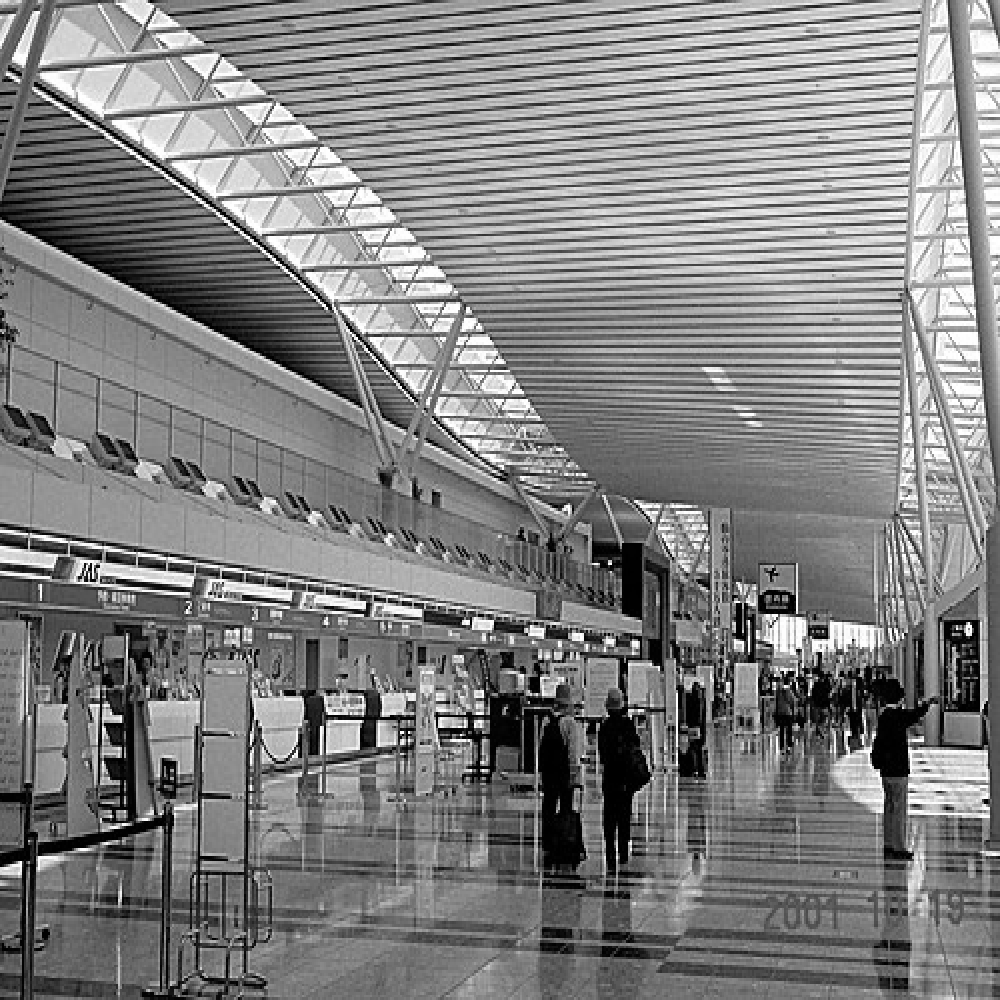

In [1]:
# Import the Image
from tensorflow.keras.preprocessing import image
filepath = "./Images/airport_inside/airport_inside_0001.jpg"
image_size = (1000, 1000)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
#im = image.load_img(filepath, target_size=image_size)
im

In [2]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
numpy_image = img_to_array(im)
numpy_image.shape

(1000, 1000, 1)

In [3]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
numpy_image /= 255

# Flatten into a 1x1000*1000 array 
img = numpy_image.flatten().reshape(-1, 1000*1000)
img.shape

(1, 1000000)

array([[0.12156862, 0.12156862, 0.15294117, ..., 0.5921569 , 0.6392157 ,
        0.6392157 ]], dtype=float32)

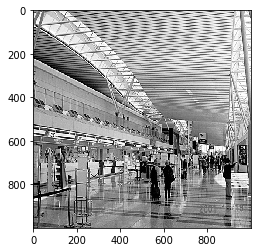

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(1000, 1000), cmap=plt.cm.Greys)
img

In [5]:
import os
# Extract the folder name from a path
path = './Images/meeting_room/c_salle8.jpg'

# Get the directory nam from the specified path 
dirname = os.path.dirname(path)
# Replace the initial part of the folder to leave just the folder name
dirname = dirname.replace("./Images/", "")
  
# Print the directory name   
print(dirname)

meeting_room


## Loop to transform the database of all images to arrays database

In [16]:
import random
import math
random_num=[]
for x in range(0, 200):
    random_num.append(math.floor(random.uniform(0, 15620)))
print(random_num)

[11783, 6219, 3794, 10945, 13912, 1043, 5970, 13007, 13647, 10826, 8593, 8985, 9918, 7991, 2783, 14350, 7417, 2515, 1990, 1740, 2294, 384, 3608, 14792, 10111, 1703, 11623, 12997, 292, 3989, 7616, 12500, 9362, 6843, 12976, 14297, 11814, 9919, 6780, 9819, 2413, 4905, 8177, 9328, 2677, 9983, 10825, 8199, 14582, 5206, 1616, 14137, 774, 11756, 7175, 15384, 5507, 13612, 9089, 14749, 14803, 9289, 1615, 9383, 2888, 10004, 8774, 8128, 11158, 14358, 13786, 8116, 4140, 5788, 9648, 10448, 14017, 4142, 4041, 564, 3960, 11408, 14251, 6745, 9106, 3202, 13102, 9423, 821, 12969, 10159, 8979, 8001, 2356, 4513, 182, 5254, 13660, 2737, 509, 372, 11878, 5167, 15123, 3288, 5916, 4048, 10525, 7725, 13529, 13921, 973, 3893, 1761, 10266, 9339, 2800, 2099, 9816, 10805, 3131, 14509, 587, 5832, 7798, 5269, 9715, 6364, 11349, 10369, 4044, 9037, 7458, 4879, 2258, 1280, 3768, 14569, 3739, 13466, 6357, 10239, 2059, 1265, 3380, 6225, 12131, 14587, 13544, 15436, 2647, 15088, 11263, 15107, 14793, 8886, 13327, 6503, 1310

In [17]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

# Path for looking all jpg files
path = './Images/'

# All path files for jpg files contained in the files list
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

# Use it for testing the code. It limits the files to 10 files
#files = files[0:200]

myfiles = []
for i in random_num:
    myfiles.append(files[i])
    
myfiles


['./Images/warehouse/warehouse_0460.jpg',
 './Images/grocerystore/grocery_store_lg.jpg',
 './Images/bathroom/bath166.jpg',
 './Images/bar/bar_0492.jpg',
 './Images/buffet/860304346_f61ad7eb22.jpg',
 './Images/restaurant/restaurante_26_11_altavista.jpg',
 './Images/dining_room/HO_06_04_4000_45_l.jpg',
 './Images/kitchen/indoor_0164.jpg',
 './Images/closet/WH_RI_with_SuperSlide.jpg',
 './Images/nursery/enfanttiage_page_dediee.jpg',
 './Images/artstudio/artist_studio_36_05_altavista.jpg',
 './Images/livingroom/int96.jpg',
 './Images/gym/gym_14_10_altavista.jpg',
 './Images/operating_room/surgery_room_07_13_altavista.jpg',
 './Images/bakery/bakery_21_08_yahoo.jpg',
 './Images/inside_subway/inside_subway_0392.jpg',
 './Images/clothingstore/MVC_013F.jpg',
 './Images/toystore/speelgoed_46_10_flickr.jpg',
 './Images/church_inside/Iglesia_de_Glew.jpg',
 './Images/pantry/2241631798_28aacb7954.jpg',
 './Images/toystore/jugueteria_04_07_yahoo.jpg',
 './Images/bedroom/room229.jpg',
 './Images/denta

In [18]:
files=myfiles

In [19]:
# Convert all images in a Database
X = []
Y = []
for f in files:
    print(f)
    # Import the Image
    filepath = f
    image_size = (1000, 1000)
    im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
    # Convert the image to a numpy array 
    numpy_image = img_to_array(im)
    # Scale the image pixels by 255 (or use a scaler from sklearn here)
    numpy_image /= 255
    # Flatten into a 1x1000*1000 array 
    img = numpy_image.flatten().reshape(-1, 1000*1000)
    # Invert the pixel values to match the original data
    img = 1 - img
    # Append the image to the database
    X.append(img)
    # Extract the folder name from each path
    # Get the directory name from the specified path 
    dirname = os.path.dirname(filepath)
    # Replace the initial part of the folder to leave just the folder name
    dirname = dirname.replace("./Images/", "")
    Y.append(dirname)

./Images/warehouse/warehouse_0460.jpg
./Images/grocerystore/grocery_store_lg.jpg
./Images/bathroom/bath166.jpg
./Images/bar/bar_0492.jpg
./Images/buffet/860304346_f61ad7eb22.jpg
./Images/restaurant/restaurante_26_11_altavista.jpg
./Images/dining_room/HO_06_04_4000_45_l.jpg
./Images/kitchen/indoor_0164.jpg
./Images/closet/WH_RI_with_SuperSlide.jpg
./Images/nursery/enfanttiage_page_dediee.jpg
./Images/artstudio/artist_studio_36_05_altavista.jpg
./Images/livingroom/int96.jpg
./Images/gym/gym_14_10_altavista.jpg
./Images/operating_room/surgery_room_07_13_altavista.jpg
./Images/bakery/bakery_21_08_yahoo.jpg
./Images/inside_subway/inside_subway_0392.jpg
./Images/clothingstore/MVC_013F.jpg
./Images/toystore/speelgoed_46_10_flickr.jpg
./Images/church_inside/Iglesia_de_Glew.jpg
./Images/pantry/2241631798_28aacb7954.jpg
./Images/toystore/jugueteria_04_07_yahoo.jpg
./Images/bedroom/room229.jpg
./Images/dentaloffice/dentaire_11_02_flickr.jpg
./Images/winecellar/cellar_design_svcs.jpg
./Images/kind

In [20]:
# Test X
X

[array([[0.90588236, 0.90588236, 0.8784314 , ..., 0.4352941 , 0.44313723,
         0.44313723]], dtype=float32),
 array([[0.34117645, 0.34117645, 0.34117645, ..., 0.28235292, 0.28235292,
         0.28235292]], dtype=float32),
 array([[0.56078434, 0.56078434, 0.56078434, ..., 0.6392157 , 0.6392157 ,
         0.6392157 ]], dtype=float32),
 array([[0.36470586, 0.36470586, 0.36470586, ..., 0.3843137 , 0.3843137 ,
         0.3843137 ]], dtype=float32),
 array([[0.6784314 , 0.6784314 , 0.6784314 , ..., 0.79607844, 0.79607844,
         0.79607844]], dtype=float32),
 array([[0.1607843 , 0.1607843 , 0.14117646, ..., 0.5137255 , 0.517647  ,
         0.517647  ]], dtype=float32),
 array([[0.6431372, 0.6431372, 0.6431372, ..., 0.5137255, 0.5137255,
         0.5137255]], dtype=float32),
 array([[0.5568627, 0.5568627, 0.5568627, ..., 0.7490196, 0.7490196,
         0.7490196]], dtype=float32),
 array([[0.9372549 , 0.9372549 , 0.93333334, ..., 0.31764704, 0.43921566,
         0.35686272]], dtype=float

In [21]:
# Test Y
Y

['warehouse',
 'grocerystore',
 'bathroom',
 'bar',
 'buffet',
 'restaurant',
 'dining_room',
 'kitchen',
 'closet',
 'nursery',
 'artstudio',
 'livingroom',
 'gym',
 'operating_room',
 'bakery',
 'inside_subway',
 'clothingstore',
 'toystore',
 'church_inside',
 'pantry',
 'toystore',
 'bedroom',
 'dentaloffice',
 'winecellar',
 'kindergarden',
 'pantry',
 'warehouse',
 'kitchen',
 'bedroom',
 'stairscase',
 'studiomusic',
 'airport_inside',
 'livingroom',
 'library',
 'kitchen',
 'inside_subway',
 'warehouse',
 'gym',
 'classroom',
 'gym',
 'toystore',
 'casino',
 'movietheater',
 'livingroom',
 'greenhouse',
 'mall',
 'nursery',
 'movietheater',
 'auditorium',
 'casino',
 'pantry',
 'inside_subway',
 'bedroom',
 'warehouse',
 'prisoncell',
 'subway',
 'bookstore',
 'closet',
 'livingroom',
 'winecellar',
 'winecellar',
 'livingroom',
 'pantry',
 'livingroom',
 'bakery',
 'mall',
 'museum',
 'movietheater',
 'bar',
 'inside_subway',
 'deli',
 'movietheater',
 'gameroom',
 'dining_roo